# Results for non-negative direct optimization method

In [1]:
from scipy.io import loadmat 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## quick example with 2 clusters

In [40]:
F = loadmat('factors_opt_nonneg.mat')['F']
pca = PCA(30)
X = pca.fit_transform(F)

Text(0.5, 1.0, 'Principal Values')

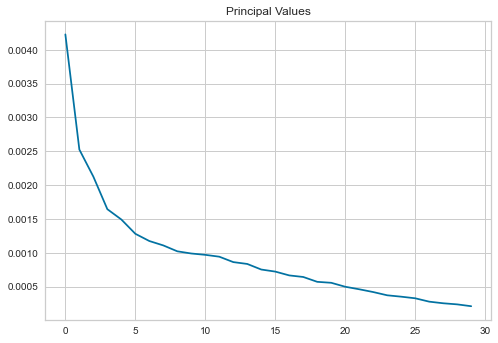

In [41]:
plt.plot(pca.explained_variance_)
plt.title('Principal Values')

In [42]:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

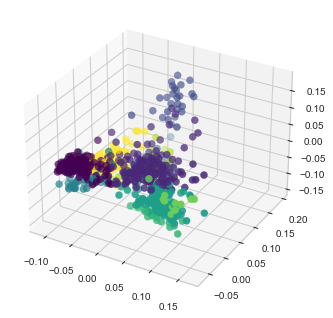

In [43]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=clusters, s=50, cmap='viridis')

In [44]:
silhouette_score(X, clusters)

0.11562698252779238

## find the optimal number of clusters, $k$

Solutions: 
1. gap statistics https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29
2. elbow method https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
I chose to use the elbow method which seemed to be the most popular one.

Documentation for yellowbrick: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


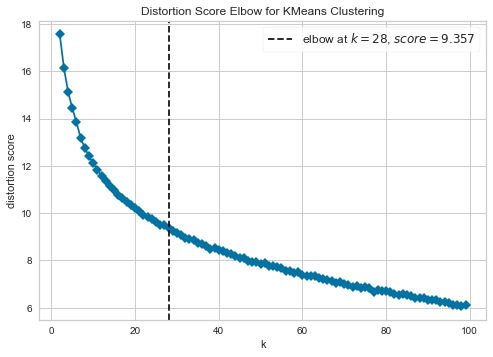

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,100), metric='distortion', timings= False)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

From the above plot, we observed that the elbow value is at K = 32, showing that the optimal number of clusters is 32. Thus we re-run the kmeans clustering with K = 32.

In [107]:
K = 32
kmeans = KMeans(init="random", n_clusters=K, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

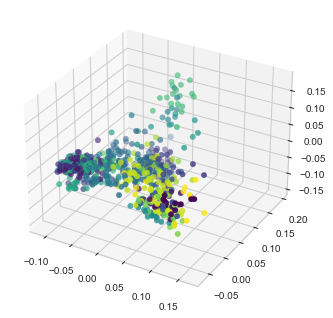

In [108]:

ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=clusters, s=30, cmap='viridis')

In [109]:
retina_original_data = loadmat('retina-201205_bgonlyb50RelNormconsecDel142.mat')['X']

In [110]:
retina_original_data.shape

(698, 6, 264)

## test plot for the second cluster

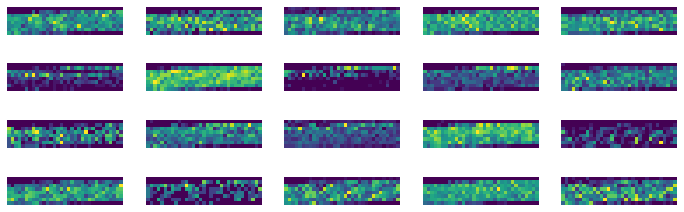

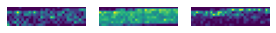

In [111]:
faces_clusters =  [[] for k in range(K)] 
for i in range(698):
    faces_clusters[clusters[i]].append(retina_original_data[i,1,:])

nfaces = np.zeros(K,dtype=int)
## number of faces in the kth cluster:
nfaces[2] = len(faces_clusters[2])
nrow = int(nfaces[2]/5)
fig, axs = plt.subplots(nrow, 5, figsize = (12,4))
for i , ax in enumerate(axs.flatten()):
    img = faces_clusters[2][i].reshape(8,33)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')
I = i + 1

fig, axs2 = plt.subplots(1, nfaces[2] - nrow * 5, figsize = (4,20))
for _,ax in enumerate(axs2.flatten()):
    img = faces_clusters[2][I].reshape(8,33)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')
    I = I + 1  
plt.tight_layout()

<ipython-input-117-fb936edc8836>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrow, ncol, figsize = (12,4))


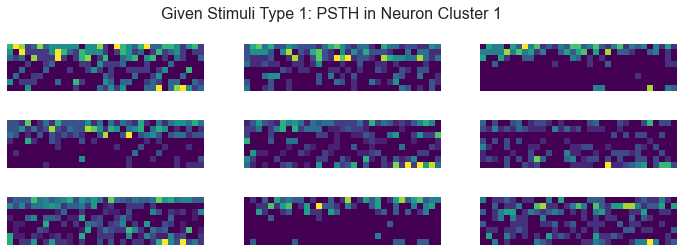

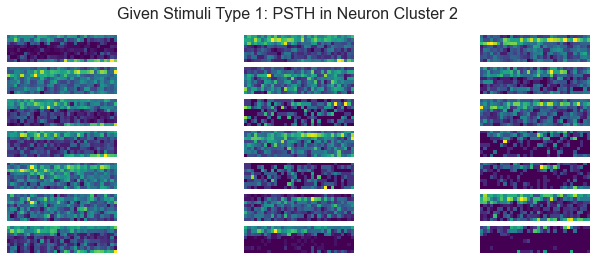

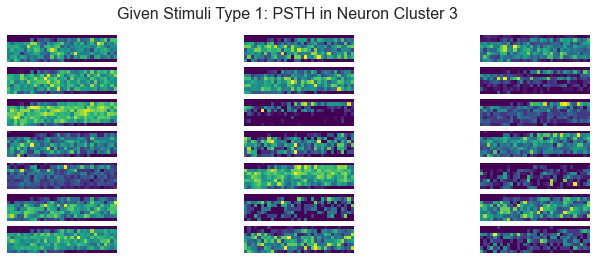

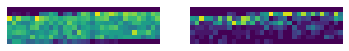

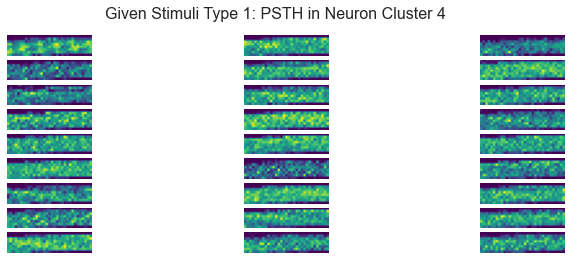

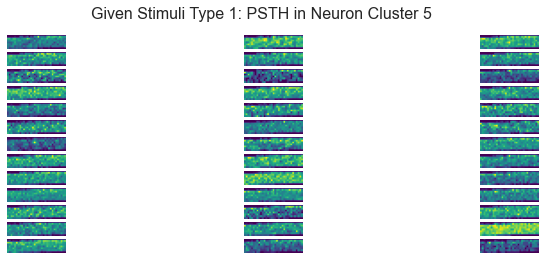

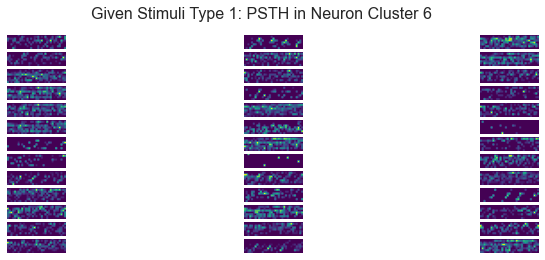

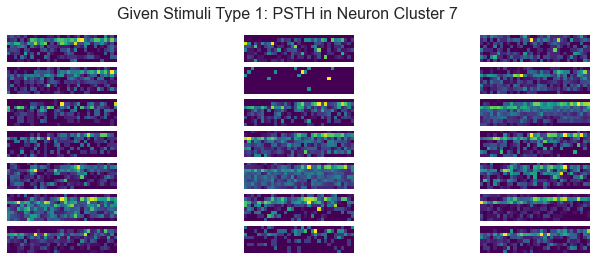

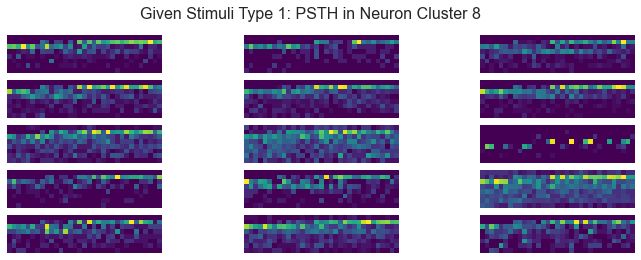

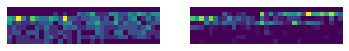

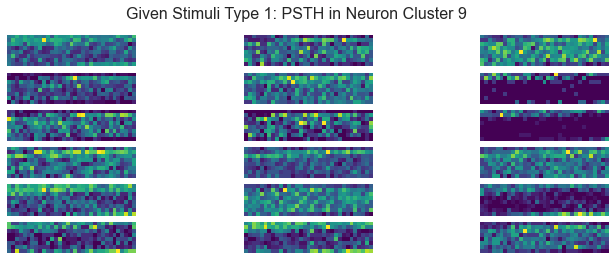

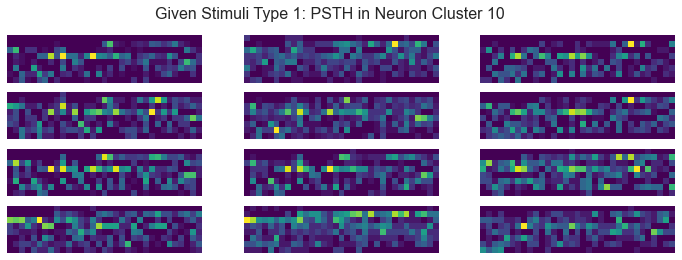

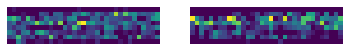

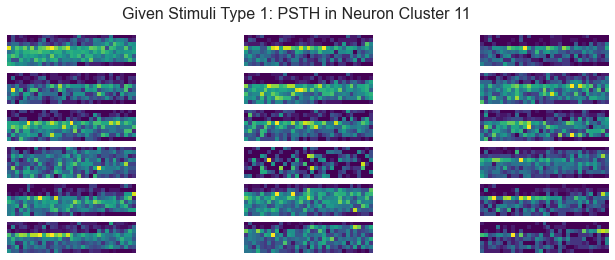

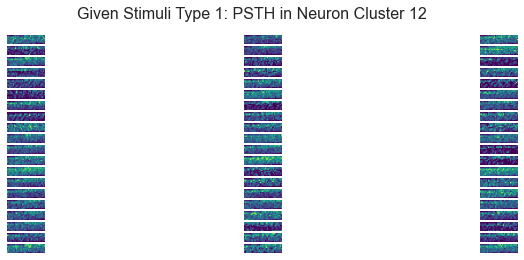

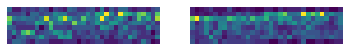

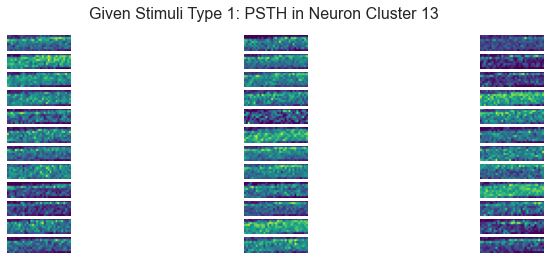

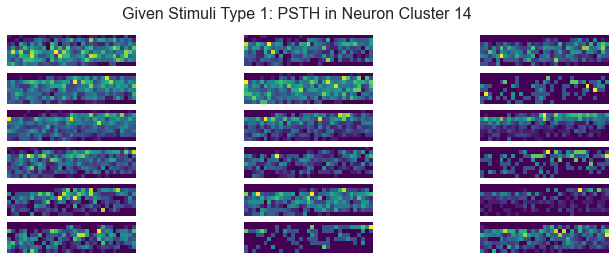

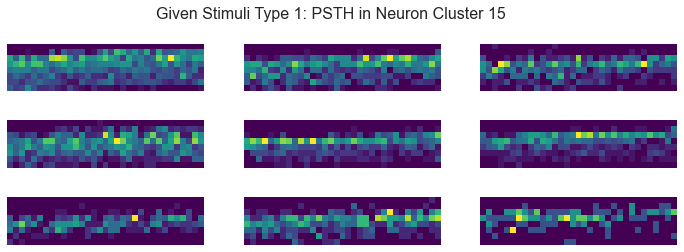

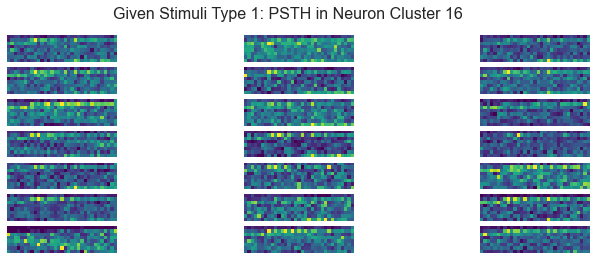

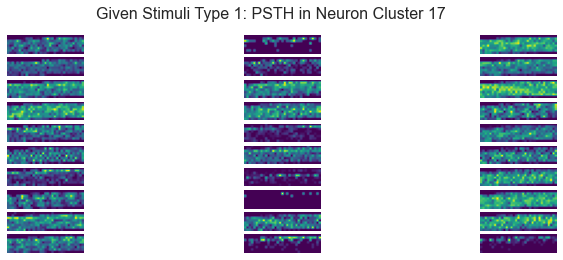

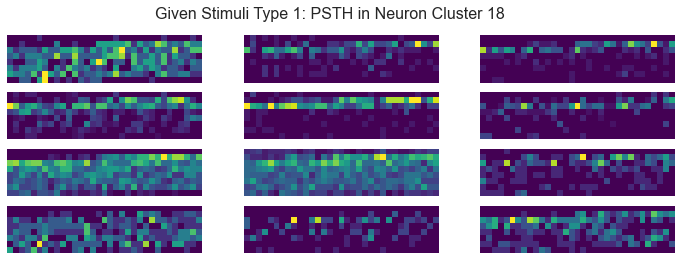

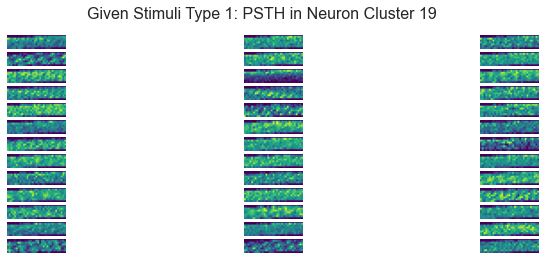

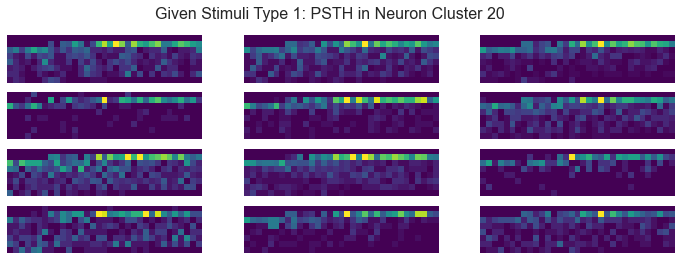

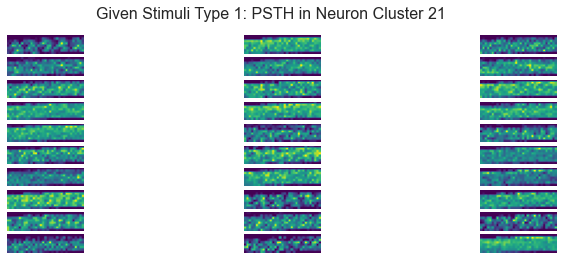

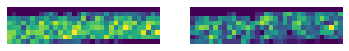

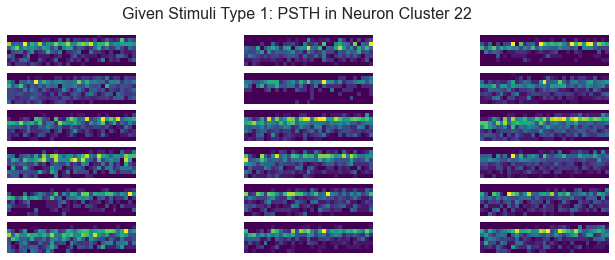

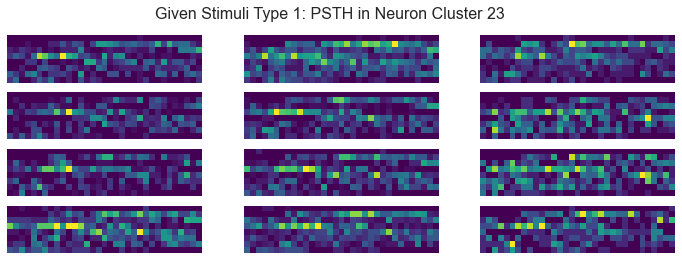

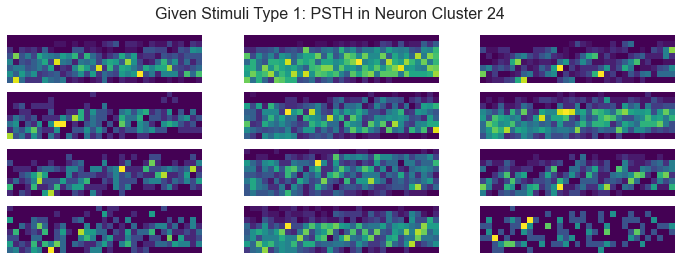

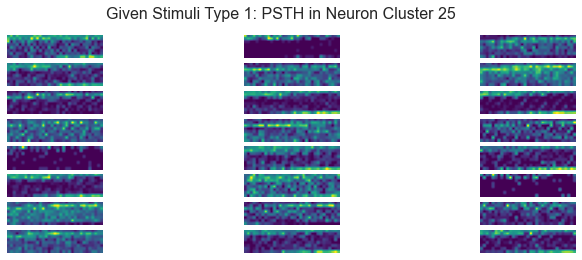

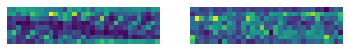

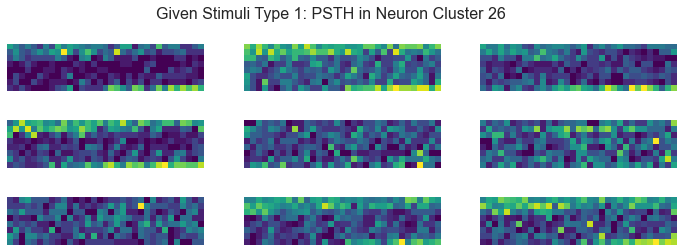

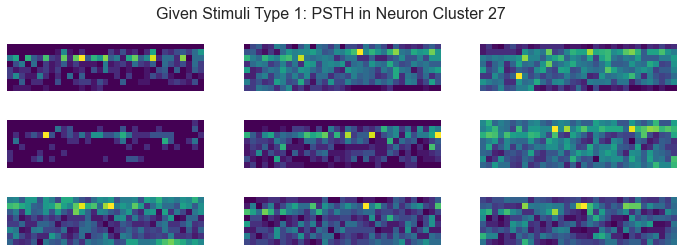

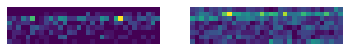

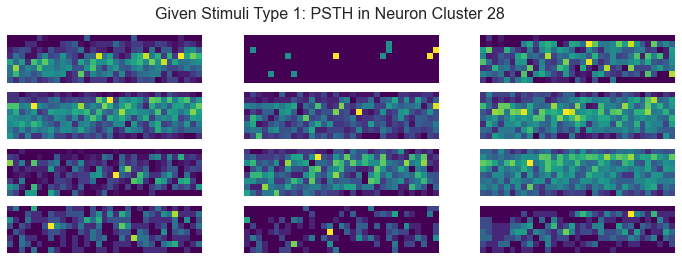

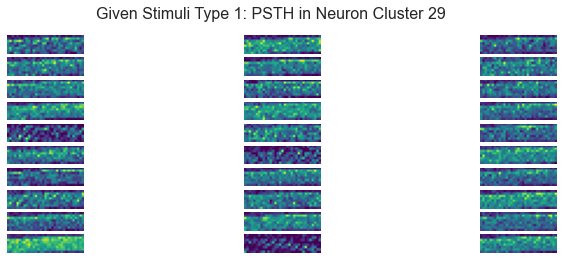

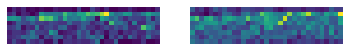

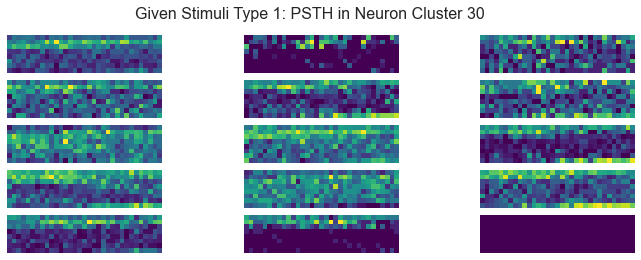

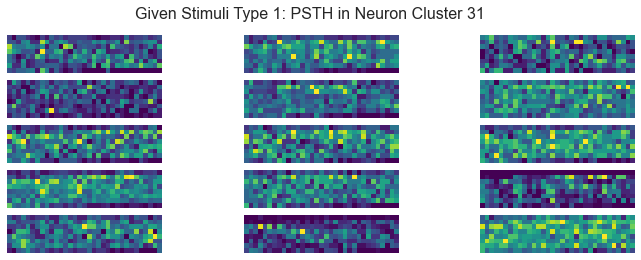

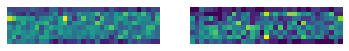

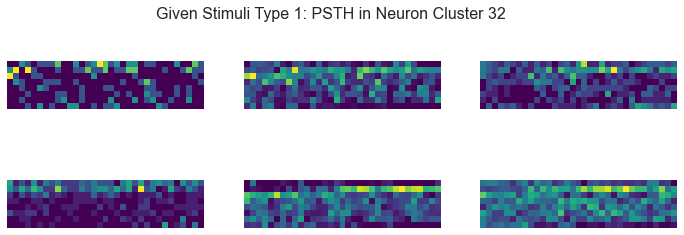

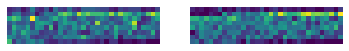

In [117]:
nfaces = np.zeros(K,dtype=int)
for k in range(0,K):
    ## number of faces in the kth cluster:
    nfaces[k] = len(faces_clusters[k])
    ncol = 3 
    nrow = int(nfaces[k]/ncol)
    fig, axs = plt.subplots(nrow, ncol, figsize = (12,4))
    for i , ax in enumerate(axs.flatten()):
        img = faces_clusters[k][i].reshape(8,33)
        ax.imshow(img, cmap = 'viridis')
        ax.axis('off')
    fig.suptitle('Given Stimuli Type 1: PSTH in Neuron Cluster ' + str(k + 1), fontsize=16)
    
    if nfaces[k] - nrow * ncol != 0:
        I = i + 1
        if nfaces[k] - nrow * ncol == 1:
            img = faces_clusters[k][I].reshape(8,33)
            plt.imshow(img, cmap = 'viridis')
            plt.axis('off')
        else:
            fig, axs = plt.subplots(1, nfaces[k] - nrow * ncol, figsize = (6,4))
            for i,ax in enumerate(axs):
                img = faces_clusters[k][I].reshape(8,33)
                ax.imshow(img, cmap = 'viridis')
                ax.axis('off')
                I = I + 1  
                

In [100]:
## hashing for more efficient storage

## evaluate the performance of clustering

In [ ]:
silhouette_score(X, clusters)

In [57]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, clusters)

2.3425678054708436

In [58]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, clusters)

25.139965836345407